# Evaluating if a introducing a new payment method will boost ridership for the MBTA
This project looks at Total boardings for 156 transit routes in the City of Boston. The goal of the study is to see if offering a touch pay payment method for public transit will boost ridership. The analysis below dissects existing data for transit lines, total boardings, and payment method to evaluate which transit lines should be included in the experiment and what metrics should be considered. 

In [5]:
#Load necessary packages
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [6]:
#Load Data
df=pd.read_csv('Payment_Type__MBTA_Bus_Routes__September_8__2009.csv')

In [7]:
#look at Data
df.head(20)

,Route Name,%CharlieCard,%Other,Total Boardings,Large Triplex Roll mag Stripe,MBTA Old Tickets,PreCut Triplex w mag Stripe,Small Paper Roll mag Stripe,CharlieCard,Other
0,216,72,12,800,92.0,7.0,15.0,14.0,577.0,95.0
1,SL Washington,79,8,11569,1038.0,130.0,275.0,84.0,9112.0,930.0
2,39,77,6,9021,787.0,382.0,233.0,68.0,6981.0,570.0
3,Green Line B,80,8,8404,656.0,150.0,104.0,57.0,6730.0,707.0
4,1,77,8,6963,732.0,139.0,99.0,67.0,5360.0,566.0
5,Green Line C,84,8,6724,410.0,83.0,62.0,29.0,5621.0,519.0
6,23,73,10,4353,514.0,30.0,121.0,46.0,3191.0,451.0
7,111,61,11,3853,623.0,61.0,363.0,40.0,2345.0,421.0
8,66,76,7,3747,382.0,96.0,116.0,33.0,2851.0,269.0
9,32,70,8,3580,598.0,55.0,102.0,23.0,2500.0,302.0


# Information about Payment type columns:

MBTA Old Tickets: This refers to magnetic tickets that are pre-encoded by a third party vendor and then distributed to T sales offices for sale to the general public. They are also distributed to Cubic, which is the vendor in charge of completing on-line and Corporate Program orders.

Triplex Roll magnetic Stripe (Large and Small): This is the type of stock used to encode magnetic tickets that are issued from Fare Vending Machines and bus Fareboxes.

PreCut Triplex with magnetic Stripe: This is the type of stock used to encode magnetic tickets that are issued for bulk production of magnetic tickets and retail sales terminals at 7-Eleven, Stop and Shop, etc.

Regular Charlie Cards are purchased pre-encoded from a third party vendor and then distributed to subway stations, select bus terminals, T sales offices and retail locations for further distribution to the general public. Student Charlie Cards and IDs are issued from back-office devices located at 10 Park Plaza.

# General Data Statistics

In [8]:
# How large is the data set?
print('Sample Size:', len(df.index))

#How many number of transit stops does the data cover?
print('Number of transit stops studied:', df['Route Name'].nunique(dropna=True))

#What is the Total number of people that ride public transit?
print('Total number of people who rode public transit during the study:', df['Total Boardings'].sum())
print()

#What is the average number of riders across all bus routes?
print('Average number of riders across all transit routes:', df['Total Boardings'].mean())
print()

Sample Size: 156
Number of transit stops studied: 156
Total number of people who rode public transit during the study: 213156

Average number of riders across all transit routes: 1366.3846153846155



# Evaluate Payment method types

In [9]:
#What is the total number of people that use a Charlie Card?
print('Total number of people who used a Charlie Card:', df.CharlieCard.sum())
print()

#Create a column that sums Large & small triplex payments
df['Triplex Roll magnetic Stripe (Large and Small)'] = df['Large Triplex Roll mag Stripe'] + df['Small Paper Roll mag Stripe']

#Create a column that sums all non-charlie card payments
df['Not Charlie Card'] = df['Triplex Roll magnetic Stripe (Large and Small)']+df['MBTA Old Tickets']+df['PreCut Triplex w mag Stripe']+df['Other']

#What is the Total number of people that use Fare Vending Machines at the bus stop?
print('Total number of people who used Fare Vending Machines at the bus stop:', df['Triplex Roll magnetic Stripe (Large and Small)'].sum())
print()

#What is the Total number of people that use Fare Vending Machines at a third party location
print('Total number of people who use Fare Vending Machines at a third party location:', df['PreCut Triplex w mag Stripe'].sum())
print()

#What is the Total number of people that use Old (precut) MBTA tickets
print('Total number of people who use use Old (precut) MBTA tickets:', df['MBTA Old Tickets'].sum())
print()

#What is the Total number of people that use another (unkown) payment method
print('Total number of people who use use another (unknown) payment method:', df['Other'].sum())
print()

Total number of people who used a Charlie Card: 154810.0

Total number of people who used Fare Vending Machines at the bus stop: 28186.0

Total number of people who use Fare Vending Machines at a third party location: 5155.0

Total number of people who use use Old (precut) MBTA tickets: 4655.0

Total number of people who use use another (unknown) payment method: 20001.0



# Calculate proportion of Charlie Card vs. non Charlie Card payment methods

In [10]:
#What is the proportion of riders that use a Charlie Card
print('Proportion of riders that use a Charlie Card:', (df['CharlieCard'].sum()/df['Total Boardings'].sum())*100)
print()

#What is the proportion of riders that use another method of payment?
print('Proportion of riders that use another method of payment:', (df['Not Charlie Card'].sum()/df['Total Boardings'].sum())*100)

Proportion of riders that use a Charlie Card: 72.62755915855055

Proportion of riders that use another method of payment: 26.776163936272024


# Look at the relationship of Payment types to Total Boardings

Text(0.5, 1.0, 'Proportion of Charlie Card and Non-Charlie Card \nPayments to Total Boardings')

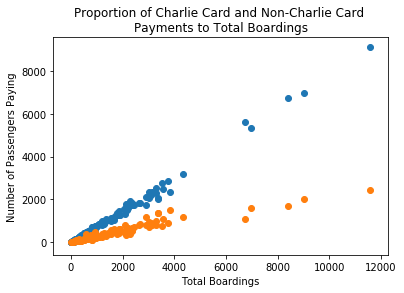

In [11]:
plt.scatter(df['Total Boardings'], df['CharlieCard'])
plt.scatter(df['Total Boardings'], df['Not Charlie Card'])
plt.ylabel('Number of Passengers Paying')
plt.xlabel('Total Boardings')
plt.title('Proportion of Charlie Card and Non-Charlie Card \nPayments to Total Boardings')

# Look at the variability for each payment type

In [12]:
#Create columns that calculate the proportion of each payment type to total boardings
df['Triplex Roll Proportion'] = (df['Triplex Roll magnetic Stripe (Large and Small)']/df['Total Boardings'])*100
df['MBTA Old Tickets Proportion'] = (df['MBTA Old Tickets']/df['Total Boardings'])*100
df['PreCut Triplex w mag Strip Proportion']= (df['PreCut Triplex w mag Stripe']/df['Total Boardings'])*100
df['Other Proportion'] = (df['Other']/df['Total Boardings'])*100
df['Charlie Card Proportion'] = (df['CharlieCard']/df['Total Boardings'])*100

#Convert NaN values to '0'
df.fillna(0)







,Route Name,%CharlieCard,%Other,Total Boardings,Large Triplex Roll mag Stripe,MBTA Old Tickets,PreCut Triplex w mag Stripe,Small Paper Roll mag Stripe,CharlieCard,Other,Triplex Roll magnetic Stripe (Large and Small),Not Charlie Card,Triplex Roll Proportion,MBTA Old Tickets Proportion,PreCut Triplex w mag Strip Proportion,Other Proportion,Charlie Card Proportion
0,216,72,12,800,92.0,7.0,15.0,14.0,577.0,95.0,106.0,223.0,13.250000,0.875000,1.875000,11.875000,72.125000
1,SL Washington,79,8,11569,1038.0,130.0,275.0,84.0,9112.0,930.0,1122.0,2457.0,9.698332,1.123693,2.377042,8.038724,78.762209
2,39,77,6,9021,787.0,382.0,233.0,68.0,6981.0,570.0,855.0,2040.0,9.477885,4.234564,2.582862,6.318590,77.386099
3,Green Line B,80,8,8404,656.0,150.0,104.0,57.0,6730.0,707.0,713.0,1674.0,8.484055,1.784864,1.237506,8.412661,80.080914
4,1,77,8,6963,732.0,139.0,99.0,67.0,5360.0,566.0,799.0,1603.0,11.474939,1.996266,1.421801,8.128680,76.978314
5,Green Line C,84,8,6724,410.0,83.0,62.0,29.0,5621.0,519.0,439.0,1103.0,6.528852,1.234384,0.922070,7.718620,83.596074
6,23,73,10,4353,514.0,30.0,121.0,46.0,3191.0,451.0,560.0,1162.0,12.864691,0.689180,2.779692,10.360671,73.305766
7,111,61,11,3853,623.0,61.0,363.0,40.0,2345.0,421.0,663.0,1508.0,17.207371,1.583182,9.421230,10.926551,60.861666
8,66,76,7,3747,382.0,96.0,116.0,33.0,2851.0,269.0,415.0,896.0,11.075527,2.562050,3.095810,7.179077,76.087537
9,32,70,8,3580,598.0,55.0,102.0,23.0,2500.0,302.0,621.0,1080.0,17.346369,1.536313,2.849162,8.435754,69.832402


ValueError: num must be 1 <= num <= 4, not 5

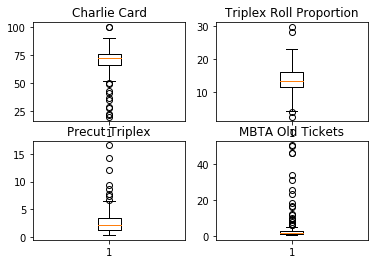

In [15]:
#Create box plots to display variability for each non-charlie card payment type

trp = df['Triplex Roll Proportion']
pct = df['PreCut Triplex w mag Strip Proportion']
mbt = df['MBTA Old Tickets Proportion']
op = df['Other Proportion']
data_to_plot = [df['Charlie Card Proportion'], df['Triplex Roll Proportion'],df['PreCut Triplex w mag Strip Proportion'], 
                                                 df['MBTA Old Tickets Proportion'], df['Other Proportion']]
#data_plot = [cc, trp, pct, mbt, op]
#fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
#ax = fig.add_subplot(111)

# Create the boxplot
#bp = ax.boxplot(data_to_plot)

fig = plt.figure(5)

fig.add_subplot(221)
plt.boxplot(cc.dropna())
plt.title('Charlie Card')

fig.add_subplot(222)
plt.boxplot(trp.dropna())
plt.title('Triplex Roll Proportion')

fig.add_subplot(223)
plt.boxplot(pct.dropna())
plt.title('Precut Triplex')

fig.add_subplot(224)
plt.boxplot(mbt.dropna())
plt.title('MBTA Old Tickets')

fig.add_subplot(225)
plt.boxplot(op.dropna())
plt.title('Other')
plt.show()


#df.boxplot('Charlie Card Proportion', grid = False)
#df.boxplot('Triplex Roll Proportion', grid = False)
#df.boxplot('PreCut Triplex w mag Strip Proportion', grid = False)
#df.boxplot('Other Proportion', grid = False)
#df.boxplot('MBTA Old Tickets Proportion', grid = False)
#df.boxplot('Other Proportion', grid = False)

# Evaluate the most popular bus routes

Text(0.5, 0, 'Transit Routes')

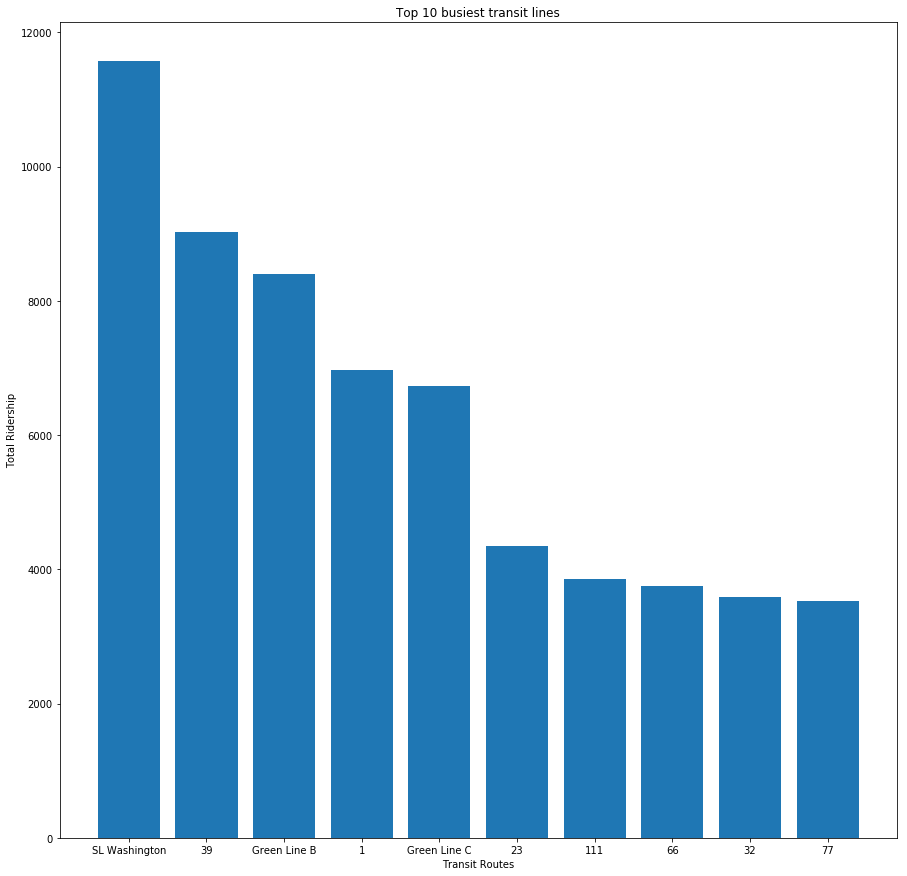

In [78]:
#What are the top ten bus routes with the most boardings?
df = df.sort_values('Total Boardings', ascending = False)
#x_pos = list(range(len(df['Route Name'])))
#print(df.head(20))

plt.figure(figsize=(15,15))
plt.bar(df['Route Name'].head(10), df['Total Boardings'].head(10))
plt.title("Top 10 busiest transit lines")
plt.ylabel('Total Ridership')
plt.xlabel('Transit Routes')

# Evaluate the proportion of riders who use a Charlie Card out of for each bus route

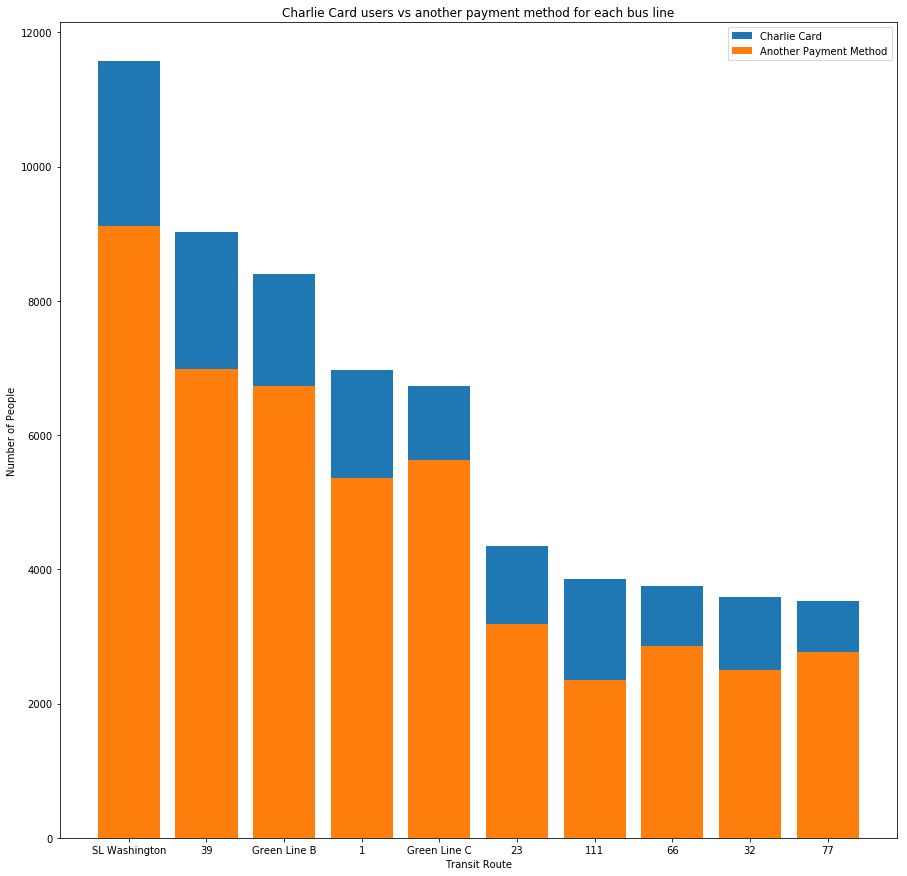

In [80]:
#What is the proportion of Charlie Card users to total riders for each transit route?
plt.figure(figsize=(15,15))
plt.bar(df['Route Name'].head(10), df['Total Boardings'].head(10), label = 'Charlie Card')
plt.bar(df['Route Name'].head(10), df['CharlieCard'].head(10), label = "Another Payment Method")

plt.title("Charlie Card users vs another payment method for each bus line")
plt.ylabel('Number of People')
plt.xlabel('Transit Route')


plt.legend(loc='upper right')

# Look at the primary forms of non-Charlie Card Payment

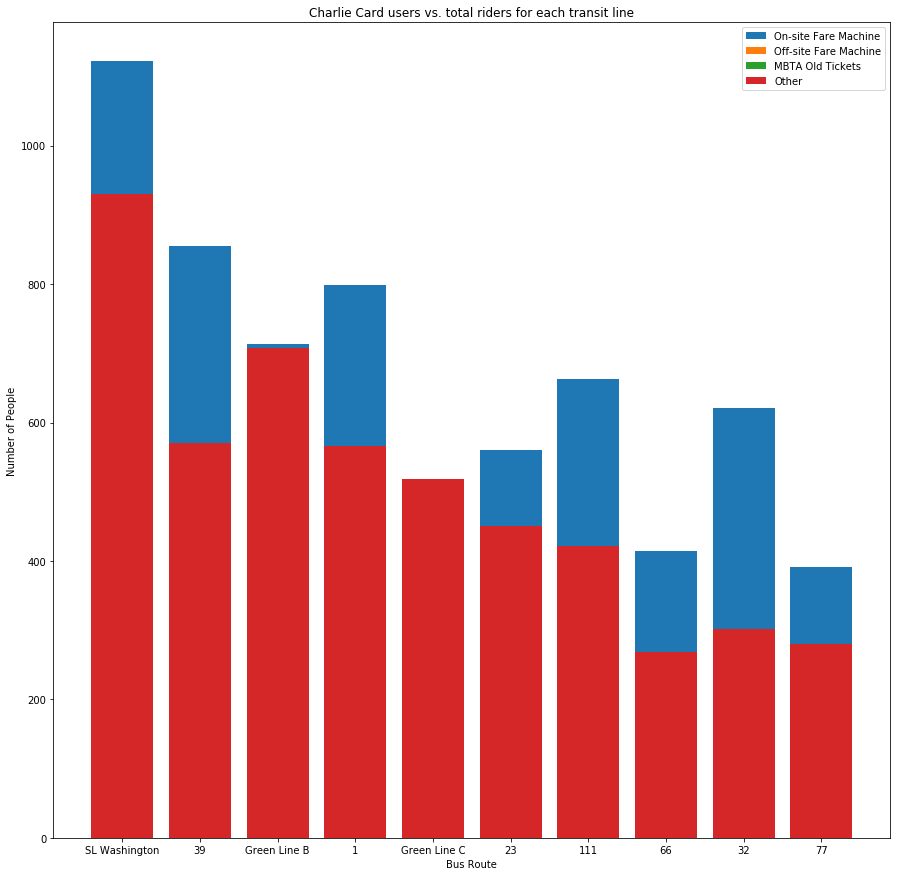

In [81]:
#What are the primary forms of non-Charlie Card Payment
plt.figure(figsize=(15,15))
plt.bar(df['Route Name'].head(10), df['Triplex Roll magnetic Stripe (Large and Small)'].head(10), label = 'On-site Fare Machine')
plt.bar(df['Route Name'].head(10), df['PreCut Triplex w mag Stripe'].head(10), label = 'Off-site Fare Machine')
plt.bar(df['Route Name'].head(10), df['MBTA Old Tickets'].head(10), label = 'MBTA Old Tickets')
plt.bar(df['Route Name'].head(10), df['Other'].head(10), label = "Other")

plt.title("Charlie Card users vs. total riders for each transit line")
plt.ylabel('Number of People')
plt.xlabel('Bus Route')


plt.legend(loc='upper right')
#plt.plot(y_group)

#x_axis = y_group.index
#y_axis = list(y_group)
#plt.figure(figsize=(15,15))
#plt.bar(x_axis, y_axis)


#y_axis = list(y_group)
#plt.bar(x, y_axis)
#plt.xlim(0,10)
#plt.xticks(x_pos, df['Route Name'].head(10), fontsize = 7, rotation = 30 )
#plt.xlabel('Bus Route', fontsize = 10)
#plt.ylabel("Average Number of Boardings", fontsize = 10)

# Summary of Existing Data

The data shows that SL Washington is the most popular bus route for Boston bus riders. The data also shows that nearly 73 percent of bus riders use a Charlie Card and nearly 27 percent use another method. Of the non-Charlie Card users, the majority of payments are done through "Other'. The data doesn't specify what this payment type is, but it can assumed that it is cash. The second most popular payment method for non-Charlie Card users is a far machine at the bus stop. Other non-Charlie Card payment options (off-site fare machines and prepaid ticket distribution) make up such a small portion of riders that they don't even appear on the graph above. 

# The Problem

While 73 percent of Boston transit riders use Charlie Cards, Charlie Cards are not able to be filled electronically. Riders must pre load the card at metro stations that have fare stations. Additionally some transit stations don't have fare stations. If we look at the above graph, we can see that the non-Charlie Card payment method for both Green Lines (B & C) is 'Other' (cash), meaning that these stations don't have fare stations to reload your Charlie Card or buy a one-time fare card. Given that both of these routes are in the top 10 most used transit routes in Boston, this is unnacceptable and likely hindering ridership at these stations. Adding a touch pay station would eliminate the need for cash, most importantly at the Green Line stations, and therefore boost ridership by making ridership more readily available. 

# The Experiment

The experiment would install touch payment pads on the top 10 bus route lines. With the touch payment pad present, riders would be able to pay either with the Charlie Card, fare card, or with their phone using a touch-phone payment method. The experiment would last for a minimum of a year to allow riders to get used to the new system as well as evaluate data during all seasons. This is important for public transit data because ridership may increase during the winter months and decrease during the summer, when the roads are better and commuters are more likely to drive, walk, or bike. The study would collect the same information as the above data set, most notably Total Boardership and method of payment.

After the year of the study, total boardings for each transit route would be compared to total boardings from the existing data set to see if there is a statistical difference in total boardings and payment type method. If the null hypothesis (that introducing a touch pay system does not impact transit ridership) is rejected, then MBTA should consider a plan to introduce touch pay machines to all of their transit lines. 